In [3]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
base_utils_path = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), 'Base'))
if base_utils_path not in sys.path:
    sys.path.append(base_utils_path)
from utils import generate_combinations
from Base.Combo_CC_Base import Combo_CC

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
prod_x = prod_y = ['1','x','y']
rem_x = rem_y = ['1','x','y','x*y','x^2','y^2']
lists = [prod_x,rem_x,prod_y,rem_y]
k_values = [1,2,0,2]

df = generate_combinations(lists, k_values,['prod_x','rem_x','prod_y','rem_y'])
remarks = ['' for i in range(len(df))]
df['remarks'] = remarks
df['parameter_range'] = remarks
# Print the DataFrame
print(df.to_string())


    prod_x_item_1 rem_x_item_1 rem_x_item_2 rem_y_item_1 rem_y_item_2 remarks parameter_range
0               1            1            x            1            x                        
1               1            1            x            1            y                        
2               1            1            x            1          x*y                        
3               1            1            x            1          x^2                        
4               1            1            x            1          y^2                        
5               1            1            x            x            y                        
6               1            1            x            x          x*y                        
7               1            1            x            x          x^2                        
8               1            1            x            x          y^2                        
9               1            1            x            y    

In [5]:
remarks = ['' for i in range(len(df))]
from Base.Combo_CC_Base import Combo_CC
for i in range(len(df)):
    if df.iloc[i]['prod_x_item_1']==df.iloc[i]['rem_x_item_1'] or df.iloc[i]['prod_x_item_1']==df.iloc[i]['rem_x_item_2']:
        if not 'zero behaviour of x at origin,' in remarks[i]:
            remarks[i] += 'zero behaviour of x at origin,'
    rem_x_set = {df.iloc[i]['rem_x_item_1'],df.iloc[i]['rem_x_item_2']}
    if df.iloc[i]['prod_x_item_1']=='y':
        if rem_x_set.issubset({'y','y^2','x*y'}):
            if not 'y=0 is a line of fixed points' in remarks[i]:
                remarks[i] += 'y=0 is a line of fixed points,'
    rem_y_st = {df.iloc[i]['rem_y_item_1'],df.iloc[i]['rem_y_item_2']}
    if rem_y_st.issubset({'x','x^2','x*y'}):
        remarks[i] += 'x=0 is a line of fixed points,'
    x_set = {df.iloc[i]['prod_x_item_1'],df.iloc[i]['rem_x_item_1']}
    y_set = {df.iloc[i]['rem_y_item_1'],df.iloc[i]['rem_y_item_2']}
    cm = Combo_CC([df.iloc[i]['prod_x_item_1']],[df.iloc[i]['rem_x_item_1'],df.iloc[i]['rem_x_item_2']],[],[df.iloc[i]['rem_y_item_1'],df.iloc[i]['rem_y_item_2']],
                      parameter_placement='x', find_nullclines=False)
    if (not (cm.y in cm.P.free_symbols)) and (not (cm.x in cm.Q.free_symbols)):
        remarks[i] += 'not connected,'
    elif (not (cm.y in cm.P.free_symbols)) or (not (cm.x in cm.Q.free_symbols)):
        remarks[i] += 'no feedback,'

df['remarks']=remarks
print(len(df[df['remarks']=='']))

243


In [6]:
remarks = df['remarks']
from conditions_five import check_stability_only_decreasing_y
for i in range(len(df)):
    if df.iloc[i]['remarks']=='':
        cm = Combo_CC([df.iloc[i]['prod_x_item_1']],[df.iloc[i]['rem_x_item_1'],df.iloc[i]['rem_x_item_2']],[],[df.iloc[i]['rem_y_item_1'],df.iloc[i]['rem_y_item_2']],
                      parameter_placement='x')
        print(f'dxdt = {cm.P}, dydt = {cm.Q}')
        stab = check_stability_only_decreasing_y(cm,[0,0],verbose=False)
        if stab==False:
            if not '0 is not stable' in remarks[i]:
                remarks[i]+='0 is not stable,'

df['remarks']=remarks
print(len(df[df['remarks']=='']))

dxdt = x*(dp0*(1 - x/100) - dp1*x - y), dydt = y*(-x - 1)
eigenvalues real part: [dp0, -1]
stability determined by linear approximation: False
dxdt = x*(dp0*(1 - x/100) - dp1*x - y), dydt = y*(-x*y - 1)
eigenvalues real part: [dp0, -1]
stability determined by linear approximation: False
dxdt = x*(dp0*(1 - x/100) - dp1*x - y), dydt = y*(-x**2 - 1)
eigenvalues real part: [dp0, -1]
stability determined by linear approximation: False
dxdt = x*(dp0*(1 - x/100) - dp1*x - y), dydt = y*(-x - y)
eigenvalues real part: [dp0, 0]
stability determined by linear approximation: False
dxdt = x*(dp0*(1 - x/100) - dp1*x - y), dydt = y*(-x - y**2)
eigenvalues real part: [dp0, 0]
stability determined by linear approximation: False
dxdt = x*(dp0*(1 - x/100) - dp1*x - y), dydt = y*(-x*y - y)
eigenvalues real part: [dp0, 0]
stability determined by linear approximation: False
dxdt = x*(dp0*(1 - x/100) - dp1*x - y), dydt = y*(-x**2 - y)
eigenvalues real part: [dp0, 0]
stability determined by linear approximati

KeyboardInterrupt: 

In [ ]:
print(df[df['remarks']==''][['prod_x_item_1','rem_x_item_1','rem_x_item_2']].drop_duplicates().to_string())
print(len(df[df['remarks']==''][['prod_x_item_1','rem_x_item_1','rem_x_item_2']].drop_duplicates()))

    prod_x_item_1 rem_x_item_1 rem_x_item_2
240             x            1            y
255             x            1          x*y
285             x            1          y^2
375             x            y          x^2
405             x          x*y          x^2
435             x          x^2          y^2
450             y            1            x
480             y            1          x*y
495             y            1          x^2
510             y            1          y^2
540             y            x          x*y
555             y            x          x^2
570             y            x          y^2
630             y          x*y          x^2
660             y          x^2          y^2
15


In [ ]:
remarks = df['remarks']
for i in range(len(df)):
    rem_x_set = {df.iloc[i]['rem_x_item_1'],df.iloc[i]['rem_x_item_2']}
    if df.iloc[i]['prod_x_item_1']=='y':
        if rem_x_set=={'x','x*y'} or rem_x_set=={'x','x^2'} or rem_x_set=={'x','y^2'} or rem_x_set=={'x','y^2'} or rem_x_set=={'x*y','x^2'} or rem_x_set=={'x^2','y^2'}:
            if not '0 is not stable' in remarks[i]:
                remarks[i]+='0 is not stable,'
    if df.iloc[i]['prod_x_item_1']=='x':
        if rem_x_set=={'y','x^2'} or rem_x_set=={'x^2','y^2'} or rem_x_set=={'x*y','x^2'}:
            if not '0 is not stable' in remarks[i]:
                remarks[i]+='0 is not stable,'
        if rem_x_set=={'1','y'} or rem_x_set=={'1','x*y'} or rem_x_set=={'1','x^2'} or rem_x_set=={'1','y^2'}:
            if not 'another stable fp at all parameter values' in remarks[i]:
                remarks[i]+='another stable fp at all parameter values,'
df['remarks']=remarks
print(len(df[df['remarks']=='']))

36


In [ ]:
indxs = df.index[df['remarks']==''].to_list()
cms_remain = []

from Base.Combo_plot_base import Combo_plot
for i,ind in enumerate(indxs):
    cm = Combo_CC([df.loc[ind]['prod_x_item_1']],[df.loc[ind]['rem_x_item_1'],df.loc[ind]['rem_x_item_2']],[],[df.loc[ind]['rem_y_item_1'],df.loc[ind]['rem_y_item_2']],
                    parameter_placement='x')
    print(f'{i} dxdt = {cm.P}, dydt = {cm.Q}')
    cms_remain.append(cm)

indxs_to_plot = [0,9,18,27]
arr2 = indxs_to_plot+[len(cms_remain)]
multiplicities = [arr2[i]-arr2[i-1] for i in range(1,len(arr2))]
cms_to_plot = [cms_remain[i] for i in indxs_to_plot]

0 dxdt = x*(dp0*y*(1 - x/100) - dp1 - x), dydt = y*(-x - 1)
1 dxdt = x*(dp0*y*(1 - x/100) - dp1 - x), dydt = y*(-x*y - 1)
2 dxdt = x*(dp0*y*(1 - x/100) - dp1 - x), dydt = y*(-x**2 - 1)
3 dxdt = x*(dp0*y*(1 - x/100) - dp1 - x), dydt = y*(-x - y)
4 dxdt = x*(dp0*y*(1 - x/100) - dp1 - x), dydt = y*(-x - y**2)
5 dxdt = x*(dp0*y*(1 - x/100) - dp1 - x), dydt = y*(-x*y - y)
6 dxdt = x*(dp0*y*(1 - x/100) - dp1 - x), dydt = y*(-x**2 - y)
7 dxdt = x*(dp0*y*(1 - x/100) - dp1 - x), dydt = y*(-x*y - y**2)
8 dxdt = x*(dp0*y*(1 - x/100) - dp1 - x), dydt = y*(-x**2 - y**2)
9 dxdt = x*(dp0*y*(1 - x/100) - dp1 - x*y), dydt = y*(-x - 1)
10 dxdt = x*(dp0*y*(1 - x/100) - dp1 - x*y), dydt = y*(-x*y - 1)
11 dxdt = x*(dp0*y*(1 - x/100) - dp1 - x*y), dydt = y*(-x**2 - 1)
12 dxdt = x*(dp0*y*(1 - x/100) - dp1 - x*y), dydt = y*(-x - y)
13 dxdt = x*(dp0*y*(1 - x/100) - dp1 - x*y), dydt = y*(-x - y**2)
14 dxdt = x*(dp0*y*(1 - x/100) - dp1 - x*y), dydt = y*(-x*y - y)
15 dxdt = x*(dp0*y*(1 - x/100) - dp1 - x*y), dydt

plotting combo 1/4
plotting combo 2/4
plotting combo 3/4
plotting combo 4/4


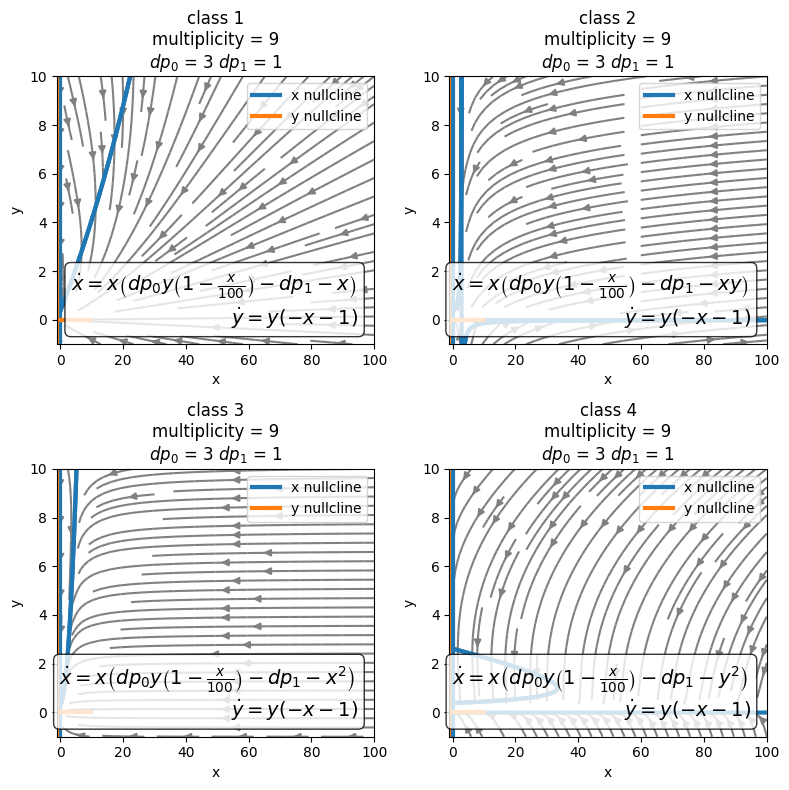

plotting combo 1/4
plotting combo 2/4
plotting combo 3/4
plotting combo 4/4


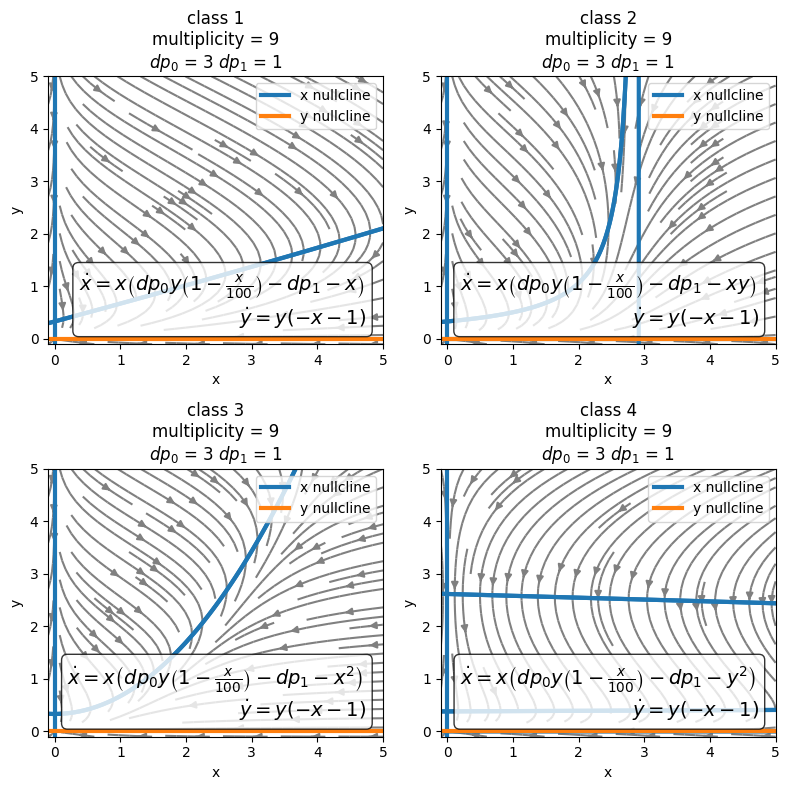

In [ ]:
from utils import draw_combos_phase_portraits
ncols = 2
par_dict = {'dp0':3, 'dp1':1}
fig,axs=draw_combos_phase_portraits(cms_to_plot,par_dict,ncols,True,4,4,[-1,100],[-1,10])
for i in range(len(cms_to_plot)):
    rw = int(i/2)
    col = i%2
    axs[rw,col].set_title(f'class {i+1}\nmultiplicity = {multiplicities[i]}\n$dp_0$ = {par_dict["dp0"]} $dp_1$ = {par_dict["dp1"]}')
fig.tight_layout()
fig.savefig('figures/row2/combos_remain_zoom_out.png')
plt.show()
fig,axs = draw_combos_phase_portraits(cms_to_plot,par_dict,ncols,True,4,4,[-0.1,5],[-0.1,5])
for i in range(len(cms_to_plot)):
    rw = int(i/2)
    col = i%2
    axs[rw,col].set_title(f'class {i+1}\nmultiplicity = {multiplicities[i]}\n$dp_0$ = {par_dict["dp0"]} $dp_1$ = {par_dict["dp1"]}')
fig.tight_layout()
fig.savefig('figures/row2/combos_remain_zoom_in_on_zero.png')


In [ ]:
df.to_csv('row2.csv')